In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [29]:
xTrain = []
yTrain = []
with open("quantile.mat", "r") as f:
    data = f.read()

appendX = True
appendY = False
for line in data.split("\n"):
    if line == "":
        if appendX:
            appendX = False
        if appendY:
            break
        continue
    if line[0] == "#":
        if not appendX and not appendY:
            appendY = True
        continue
    if appendX:
        xTrain.append(float(line))
    else:
        yTrain.append(float(line))

x = np.array(xTrain)
y = np.array(yTrain)
n = len(x)

In [53]:
def regress(tau):
    c = np.concatenate([np.ones(n)*tau, np.ones(n)*(1-tau), [0, 0]])
    A_eq = np.zeros((n, 2*n+2))
    for i in range(n):
        A_eq[i, i] = 1
        A_eq[i, n+i] = -1
        A_eq[i, -2] = 1
        A_eq[i, -1] = x[i]
        
    bounds = [(0, None) for i in range(2*n)]
    bounds.append((None,None))
    bounds.append((None,None))
    
    return linprog(c, A_eq=A_eq, b_eq=y, bounds=bounds)["x"][-2:]

def rho(tau, z):
    if z < 0:
        return z*tau - z
    return z*tau

def quantile(tau):
    beta = regress(tau)
    return beta, lambda x: beta[0] + x*beta[1]

For tau=0.25, beta=[-0.99, 0.22], i.e. we get the line y=-0.99+0.22*x.
For tau=0.50, beta=[-0.33, 0.24], i.e. we get the line y=-0.33+0.24*x.
For tau=0.75, beta=[0.45, 0.22], i.e. we get the line y=0.45+0.22*x.


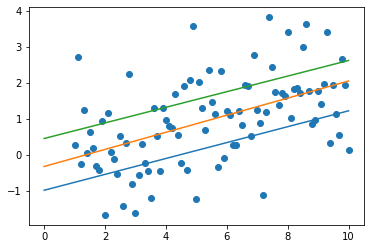

In [66]:
plt.scatter(xTrain, yTrain)
for tau in [0.25, 0.5, 0.75]:
    beta, f = quantile(tau)
    plt.plot([0, 10], [f(0), f(10)])
    print(f"For tau={tau:.2f}, beta=[{beta[0]:.2f}, {beta[1]:.2f}], "+
          f"i.e. we get the line y={beta[0]:.2f}+{beta[1]:.2f}*x.")
plt.show()